In [1]:
from __future__ import division
%pylab inline

import os
import numpy as np
import PIL.Image as pil
import tensorflow as tf
from SfMLearner import SfMLearner
from utils import normalize_depth_for_display

img_height=128
img_width=416


Populating the interactive namespace from numpy and matplotlib


In [2]:
from kitti_eval.depth_evaluation_utils import *

In [3]:
depth_map_dir='/home/ubuntu/data/dfv_KITTI_depth_result_20200414/'
test_file_list='./data/kitti/test_files_eigen.txt'
test_files = read_text_lines(test_file_list)

kitti_dir='/home/ubuntu/data/raw_data_KITTI/'



In [4]:
#pred_file="/home/ubuntu/data/dfv_KITTI_depth_result_20200414/result.npy"
# KITTI trained, Depth from video

#pred_file="/home/ubuntu/data/SfMLearner_result_20200413/model-190532.npy"
# SfM Learner


pred_file="/home/ubuntu/data/dfv_KITTI_depth_result_20200414/result2.npy"
# KITTI + Cityscapes trained, Depth from video

In [5]:
pred_depths = np.load(pred_file)

In [6]:
pred_depths=pred_depths.reshape(697, 128, 416)
#size is same

In [7]:
pred_depths[0]

array([[8.611643 , 8.638459 , 8.641462 , ..., 4.933108 , 4.7620277,
        4.888956 ],
       [8.574201 , 8.620672 , 8.646226 , ..., 4.725038 , 4.7442822,
        4.626306 ],
       [8.591261 , 8.645325 , 8.651073 , ..., 4.7948203, 4.691023 ,
        4.6347575],
       ...,
       [3.612707 , 3.606479 , 3.6052575, ..., 3.8301535, 3.8720756,
        3.8343325],
       [3.5709698, 3.576166 , 3.5743709, ..., 3.6449797, 3.6815686,
        3.6354766],
       [3.570947 , 3.5664136, 3.550115 , ..., 3.7432911, 3.6690974,
        3.7013788]], dtype=float32)

In [8]:
pred_depths[0].shape

(128, 416)

In [9]:
gt_files, gt_calib, im_sizes, im_files, cams = read_file_data(test_files, kitti_dir)

# Content

In [10]:
I = pil.open(im_files[0])
I = I.resize((img_width, img_height), pil.ANTIALIAS)
I = np.array(I)

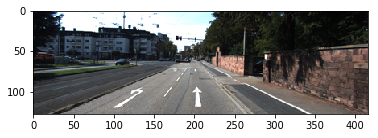

In [11]:
imshow(I)

In [12]:
gt_files[0]

'/home/ubuntu/data/raw_data_KITTI/2011_09_26/2011_09_26_drive_0002_sync/velodyne_points/data/0000000069.bin'

In [13]:
im_sizes[0]

(375, 1242)

# Continue

In [14]:
num_test = len(im_files)

In [15]:
gt_depths = []
pred_depths_resized = []

In [16]:
for t_id in range(num_test):
    print(t_id)
    camera_id = cams[t_id]  # 2 is left, 3 is right
    pred_depths_resized.append(cv2.resize(pred_depths[t_id], (im_sizes[t_id][1], im_sizes[t_id][0]),interpolation=cv2.INTER_LINEAR))
    depth = generate_depth_map(gt_calib[t_id],gt_files[t_id],im_sizes[t_id],camera_id, False,True)
    gt_depths.append(depth.astype(np.float32))

0
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
1
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
2
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
3
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
4
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
5
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
6
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
7
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902

70
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
71
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
72
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
73
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
74
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
75
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
76
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
77
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -

139
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
140
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
141
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
142
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
143
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
144
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
145
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
146
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

204
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
205
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
206
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
207
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
208
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
209
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
210
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
211
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

268
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
269
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
270
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
271
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
272
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
273
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
274
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
275
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

330
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
331
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
332
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
333
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
334
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
335
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
336
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
337
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

397
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
398
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
399
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
400
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
401
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
402
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
403
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
404
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

460
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
461
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
462
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
463
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
464
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
465
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
466
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
467
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

522
[ 0.00692796 -0.9999722  -0.00275783 -0.00116298  0.00274984 -0.9999955
  0.9999753   0.00693114 -0.0011439 ]
523
[ 0.00692796 -0.9999722  -0.00275783 -0.00116298  0.00274984 -0.9999955
  0.9999753   0.00693114 -0.0011439 ]
524
[ 0.00692796 -0.9999722  -0.00275783 -0.00116298  0.00274984 -0.9999955
  0.9999753   0.00693114 -0.0011439 ]
525
[ 0.00692796 -0.9999722  -0.00275783 -0.00116298  0.00274984 -0.9999955
  0.9999753   0.00693114 -0.0011439 ]
526
[ 0.00692796 -0.9999722  -0.00275783 -0.00116298  0.00274984 -0.9999955
  0.9999753   0.00693114 -0.0011439 ]
527
[ 0.00692796 -0.9999722  -0.00275783 -0.00116298  0.00274984 -0.9999955
  0.9999753   0.00693114 -0.0011439 ]
528
[ 0.00692796 -0.9999722  -0.00275783 -0.00116298  0.00274984 -0.9999955
  0.9999753   0.00693114 -0.0011439 ]
529
[ 0.00692796 -0.9999722  -0.00275783 -0.00116298  0.00274984 -0.9999955
  0.9999753   0.00693114 -0.0011439 ]
530
[ 0.00692796 -0.9999722  -0.00275783 -0.00116298  0.00274984 -0.9999955
  0.9999753 

591
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
592
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
593
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
594
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
595
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
596
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
597
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
598
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.18431

657
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
658
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
659
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
660
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
661
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
662
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
663
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
664
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.24171

In [17]:
pred_depths = pred_depths_resized

# Example i=0

In [18]:
i=0

In [19]:
gt_depth = gt_depths[i]
pred_depth = np.copy(pred_depths[i])

In [20]:
gt_depth

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 5.752, 0.   , 5.741]], dtype=float32)

In [21]:
#pred_depth[0]

In [22]:
min_depth=1e-3
max_depth=80

In [23]:
mask = np.logical_and(gt_depth > min_depth,gt_depth < max_depth)

In [24]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False,  True]])

In [25]:
rms     = np.zeros(num_test, np.float32)
log_rms = np.zeros(num_test, np.float32)
abs_rel = np.zeros(num_test, np.float32)
sq_rel  = np.zeros(num_test, np.float32)
d1_all  = np.zeros(num_test, np.float32)
a1      = np.zeros(num_test, np.float32)
a2      = np.zeros(num_test, np.float32)
a3      = np.zeros(num_test, np.float32)

In [26]:
gt_height, gt_width = gt_depth.shape

In [27]:
crop = np.array([0.40810811 * gt_height,  0.99189189 * gt_height,0.03594771 * gt_width,   0.96405229 * gt_width]).astype(np.int32)
crop_mask = np.zeros(mask.shape)




In [28]:
crop_mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
crop_mask[crop[0]:crop[1],crop[2]:crop[3]] = 1


In [30]:
mask = np.logical_and(mask, crop_mask)

In [31]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [32]:
# Scale matching
scalor = np.median(gt_depth[mask])/np.median(pred_depth[mask])
pred_depth[mask] *= scalor
# Why?

pred_depth[pred_depth < min_depth] = min_depth
pred_depth[pred_depth > max_depth] = max_depth
abs_rel[i], sq_rel[i], rms[i], log_rms[i], a1[i], a2[i], a3[i] = compute_errors(gt_depth[mask], pred_depth[mask])

# All i

In [33]:
for i in range(num_test):    
        gt_depth = gt_depths[i]
        pred_depth = np.copy(pred_depths[i])

        mask = np.logical_and(gt_depth > min_depth, 
                              gt_depth < max_depth)
        # crop used by Garg ECCV16 to reprocude Eigen NIPS14 results
        # if used on gt_size 370x1224 produces a crop of [-218, -3, 44, 1180]
        gt_height, gt_width = gt_depth.shape
        crop = np.array([0.40810811 * gt_height,  0.99189189 * gt_height,   
                         0.03594771 * gt_width,   0.96405229 * gt_width]).astype(np.int32)

        crop_mask = np.zeros(mask.shape)
        crop_mask[crop[0]:crop[1],crop[2]:crop[3]] = 1
        mask = np.logical_and(mask, crop_mask)

        # Scale matching
        scalor = np.median(gt_depth[mask])/np.median(pred_depth[mask])
        pred_depth[mask] *= scalor

        pred_depth[pred_depth < min_depth] = min_depth
        pred_depth[pred_depth > max_depth] = max_depth
        abs_rel[i], sq_rel[i], rms[i], log_rms[i], a1[i], a2[i], a3[i] = \
            compute_errors(gt_depth[mask], pred_depth[mask])

In [34]:
print("{:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}".format('abs_rel', 'sq_rel', 'rms', 'log_rms', 'd1_all', 'a1', 'a2', 'a3'))
print("{:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}".format(abs_rel.mean(), sq_rel.mean(), rms.mean(), log_rms.mean(), d1_all.mean(), a1.mean(), a2.mean(), a3.mean()))

   abs_rel,     sq_rel,        rms,    log_rms,     d1_all,         a1,         a2,         a3
    0.2253,     2.3034,     9.5893,     0.3658,     0.0000,     0.6083,     0.8351,     0.9123


In [35]:
abs_rel

array([0.18136653, 0.1965545 , 0.19882943, 0.1929172 , 0.2025681 ,
       0.21550728, 0.1753401 , 0.17992629, 0.23867668, 0.20035534,
       0.19253632, 0.19135553, 0.18433577, 0.21165718, 0.17020069,
       0.1999355 , 0.19879033, 0.227579  , 0.18363951, 0.25794804,
       0.20682237, 0.21231484, 0.20737755, 0.17760353, 0.19263609,
       0.2505593 , 0.2541982 , 0.21164766, 0.2551229 , 0.28470317,
       0.22795703, 0.20438398, 0.2289591 , 0.27430528, 0.28570867,
       0.301403  , 0.21874994, 0.17946346, 0.1807443 , 0.29356223,
       0.23417443, 0.29180738, 0.22381361, 0.24878258, 0.24441661,
       0.28543487, 0.26833883, 0.23369722, 0.2935844 , 0.25739163,
       0.19699107, 0.23413585, 0.21395531, 0.2353993 , 0.20565765,
       0.2329574 , 0.256446  , 0.22162206, 0.27732688, 0.2633108 ,
       0.18454908, 0.26131114, 0.196247  , 0.21358295, 0.2730023 ,
       0.19510667, 0.26643696, 0.22684942, 0.24970132, 0.28066808,
       0.27614903, 0.27714515, 0.25325385, 0.26913184, 0.26395

In [36]:
len(abs_rel)

697